## Introduction

Hi I am Daniel and I am about to explore data on churn for a given month, learn to predict the probability of churn, analyze the factors that impact churn most, draw basic conclusions and develop recommendations on how to improve customer service.
Lets start our journey!

## Initialization

In [1]:
# loading all the libraries
import pandas as pd
from IPython.display import display
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")




## Carry out exploratory data analysis (EDA)

**Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).**

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.columns = gym.columns.str.lower()
display(gym.sample(10))
display(gym.info())
display(gym.describe())
print("number of duplications:", gym.duplicated().sum())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1516,0,1,0,0,1,1,1,27,12.100221,1.0,0,1.694470,1.014494,1
2552,1,1,1,1,1,12,0,28,257.176390,7.0,14,3.283131,3.210571,0
2118,1,1,0,0,1,1,0,32,55.951046,1.0,3,0.883247,0.215302,1
2447,0,1,1,0,1,1,1,29,165.485355,1.0,1,0.705468,0.387104,1
1504,1,1,1,0,0,1,0,34,141.434646,1.0,3,1.366317,1.179171,0
2881,0,1,1,1,1,12,1,28,290.781404,12.0,3,2.370044,2.364436,0
2878,1,1,0,1,1,1,0,30,150.743445,1.0,6,2.360604,2.315064,0
819,1,0,1,0,1,1,0,33,93.778603,1.0,3,1.426809,1.422601,0
2233,1,1,0,0,1,1,0,31,211.728970,1.0,3,1.585225,1.539995,0
1320,1,1,0,1,1,1,0,33,12.056007,1.0,6,4.699018,4.786793,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


number of duplications: 0


We have no missing values , the data types seem correct and we have 0 duplicates.
What a great start :)

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).**

In [3]:
gym_churn_grouped = gym.groupby(['churn'])['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'].mean()
gym_churn_grouped

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

For those who Stayed:


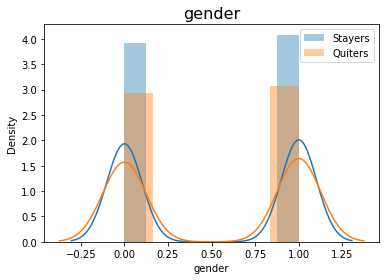

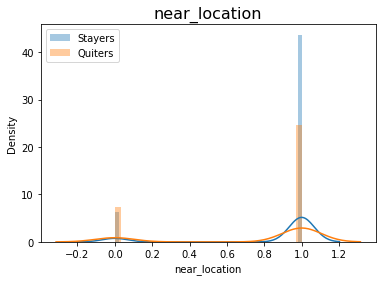

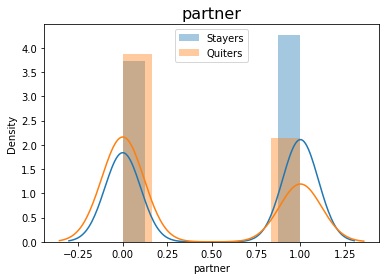

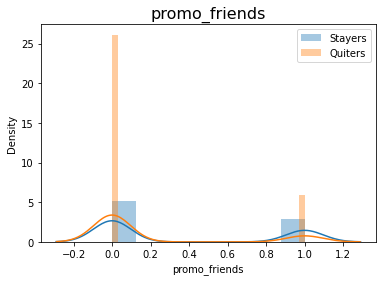

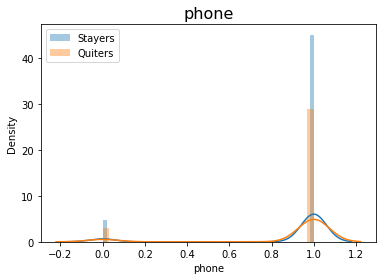

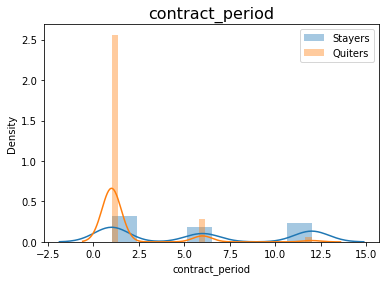

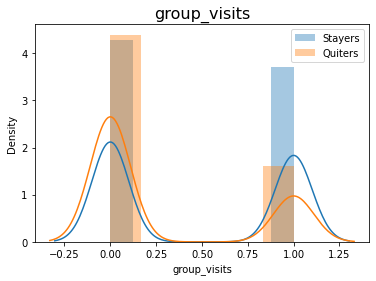

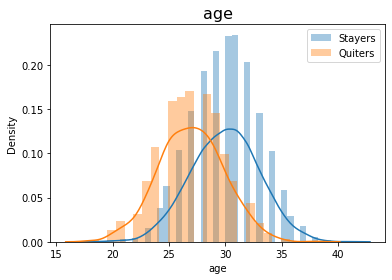

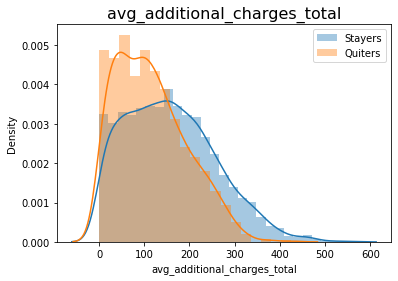

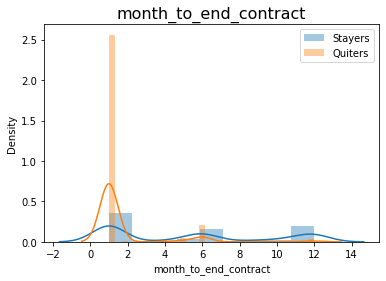

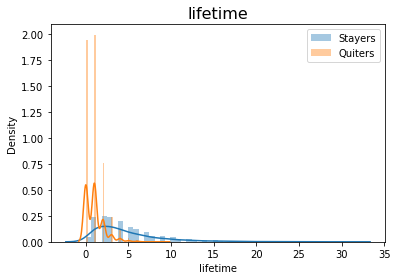

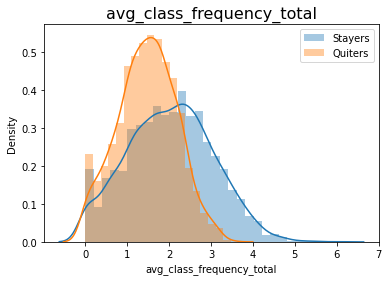

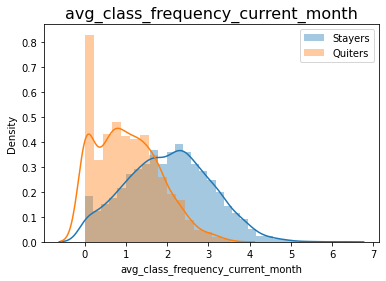

In [4]:
gym_stayers = gym.loc[gym['churn'] == 0]
gym_quiters = gym.loc[gym['churn'] == 1]

print('For those who Stayed:')

for col in gym.drop('churn', axis = 1).columns:
    sns.distplot(gym_stayers[col], label='Stayers')
    sns.distplot(gym_quiters[col], label='Quiters')
    plt.title(col, fontsize=16)
    plt.legend()
    plt.show()


1. **Gender**: gender doesn't effect churn rates.
2. **Location**: among those who live or work near the to gym, we have more stayers while people who live far from the gym tend to quit more - this means that location might affect on churn rates.
3. **Partner**: there's almost a 50/50 churn chance for customers that don't belong to a partner company, while on the other hand the churn chances for customers that belong to a partner company are much lower, almost at 65/35 (65% stayers, 35% quitters)
4. **Group visits**: same thing said above about **Partner** customers can be said about customers that used to go to group visits.
5. **Age**: Highest churn rates are among customers aging 25-30 while highest stay rates are among customers aging 30-35 - can age be a factor for churning?
6. **Average additional charges**: we can say that customers with low addition charges are slightly more likely to churn and customers with relatively high addition charges are slightly more likely to stay.
7. **Lifetime**: (Important) Seems like customers with the least **lifetime** at the gym are more likely to churn while customers with relatively high lifetime values are less likely to churn. Now this doesn't mean that customers with low lifetime values are certainly going to leave or customers with high lifetime values are certainly going to stay but what this says is that **Lifetime** is a very imporant factor on churn rates.
8. **Average class frequency**: same thing we said about **Average additional charges** can be said here.

**Build a correlation matrix and display it.**

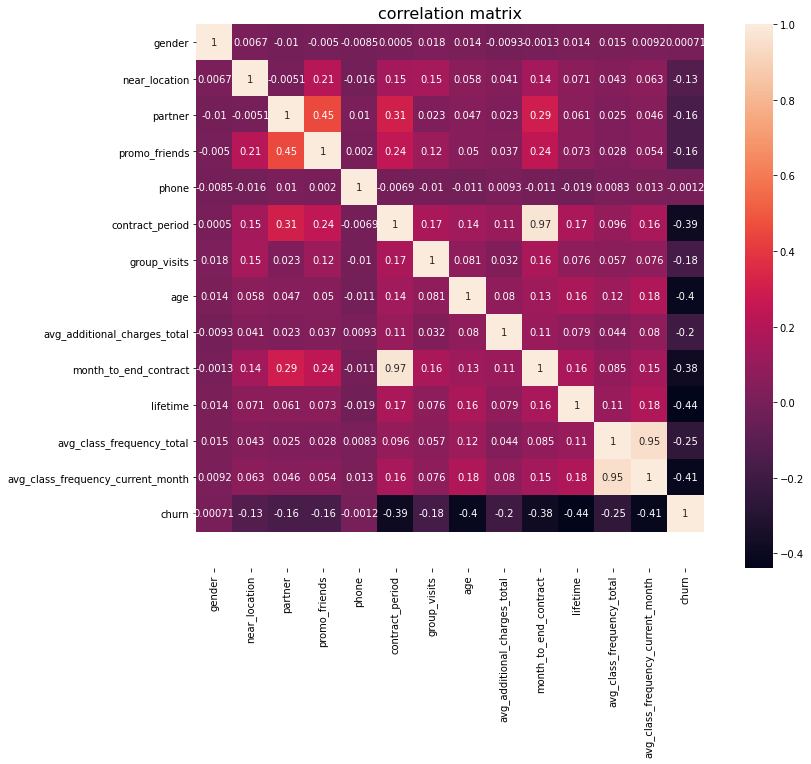

In [5]:
cm = gym.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize=(15,10))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square = True) 
ax.set_ylim(15, 0) # correcting "ragged" heatnap fields in the latest version of the library
plt.title('correlation matrix', fontsize=16)
plt.show()

avg_class_frequency_total and contract_period are highly correlated so we need to drop them for our predicting module to work better.

In [6]:
gym = gym.drop(['avg_class_frequency_total', 'contract_period'], axis = 1) # dropping highly correlated features 
gym.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0


## Build a model to predict user churn

**Divide the data into train and validation sets using the train_test_split() function.**

In [7]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # divide the data into train and test

Same as in platform training

**Train the model on the train set with two methods:**

I've chosen Random Forest and Logistic Regression models

In [25]:
models = [LogisticRegression(random_state = 0), RandomForestClassifier(random_state = 0)]

In [26]:
# defining a function to calculate the error scores
def calculate_metrics(y_test, predictions):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1 Score: {:.2f}'.format(f1_score(y_test, predictions))) 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
We are ready! Function is a good variant :) </div>

In [27]:
# training the models then predicting 
for model in models:
    print(model) # to know what metrics is to what model
    model.fit(X_train, y_train) # train the model on train data
    probabilities = model.predict_proba(X_test)[:,1] # use the trained model to make forecasts
    predictions = model.predict(X_test) # binary prediction
    print(probabilities.mean())
    calculate_metrics(y_test, predictions) # print the mertic scores

LogisticRegression()
0.2573762821292067
Accuracy: 0.90
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
RandomForestClassifier(random_state=0)
0.26542499999999997
Accuracy: 0.91
Precision: 0.83
Recall: 0.79
F1 Score: 0.81


**Refitting and setting a threshold**

In [11]:
# Lets train our model with a preset threshold
threshold = gym_quiters.shape[0]/gym_stayers.shape[0] # the percent of churners of non-churners
print(threshold)

0.36100714528751277


In [12]:
for model in models:
    print('\n', model) # to know what metrics is to what model
    model.fit(X_train, y_train) # train the model on train data
    probabilities = model.predict_proba(X_test)[:,1] # use the trained model to make forecasts
    predictions = [0 if i < threshold else 1 for i in probabilities]
    print(probabilities.mean())
    calculate_metrics(y_test, predictions) # print the mertic scores


 LogisticRegression(random_state=0)
0.2573762821292067
Accuracy: 0.89
Precision: 0.73
Recall: 0.85
F1 Score: 0.79

 RandomForestClassifier(random_state=0)
0.26542499999999997
Accuracy: 0.89
Precision: 0.74
Recall: 0.87
F1 Score: 0.80


At the first training session we got 0.79 F1 score for *Logistic Regression* and 0.81 F1 score for *Random Forest* meaning that *Random Forest* had slightly better results than his competitor.
When we added a threshold, precision overall got worse for both models while recall got better for both of them, yet Random Forest still had better F1 results. From the results above, it is recommended to use **Random Forest Classifier** in this case since it had slightly better results!

## Unsupervised ML

At this part, we'll use the K-means algorithm on a standardized matrix in order to divide our customers into clusters that share similar features. In return that may help us find which cluster is more **prone for churn** and what features these cluster share - **this leads us to features that may affect the churn rates**.

**K-Means algorithm**

In [13]:
# normalizing and standardizing the data
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

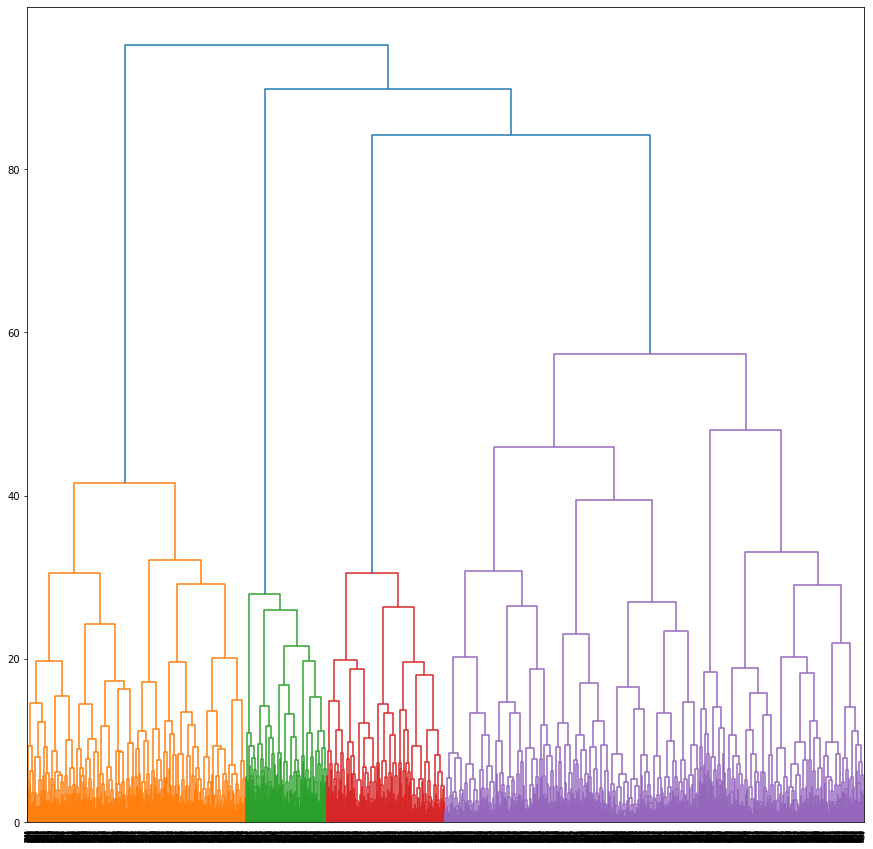

In [14]:
# linkage + dendrogram
lk_matrix = linkage(X_st, 'ward')
plt.figure(figsize = (15,15))
dendrogram(lk_matrix)
plt.show()

Our dendrogram shows that our customers can be divided into 4 main clusters. Lets continue:
Next we'll train our model using the K-means algorithm and 5 clusters (although we found out above that we have 4 main clusters but we were advised to use 5 clusters in the training)

In [15]:
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(X_st)

In [16]:
gym['cluster'] = labels
gym.iloc[0] # having a look at how a row might look like

gender                                1.00000
near_location                         1.00000
partner                               1.00000
promo_friends                         1.00000
phone                                 0.00000
group_visits                          1.00000
age                                  29.00000
avg_additional_charges_total         14.22747
month_to_end_contract                 5.00000
lifetime                              3.00000
avg_class_frequency_current_month     0.00000
churn                                 0.00000
cluster                               3.00000
Name: 0, dtype: float64

**Clusters' shared features**

In [17]:
gym_grouped = gym.groupby('cluster').mean()
gym_grouped

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.546875,0.996094,0.371094,0.013672,1.0,0.526367,30.695312,178.730133,5.544922,5.403320,2.330629,0.016602
1,0.489504,1.000000,0.222328,0.070611,1.0,0.287214,27.560115,116.246876,1.993321,1.892176,1.178796,0.570611
2,0.500000,0.000000,0.489247,0.078853,1.0,0.232975,28.679211,137.125763,2.818996,2.974910,1.597146,0.403226
3,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.723967,0.266839
4,0.494919,0.995935,0.893293,1.000000,1.0,0.522358,29.583333,153.199183,6.328252,4.270325,1.920331,0.119919


In [18]:
# features with categorical values
categrical_feats = gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn', 'cluster']]
# features with numerical values
numerical_feats = gym[['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month']]

Numeric Features:


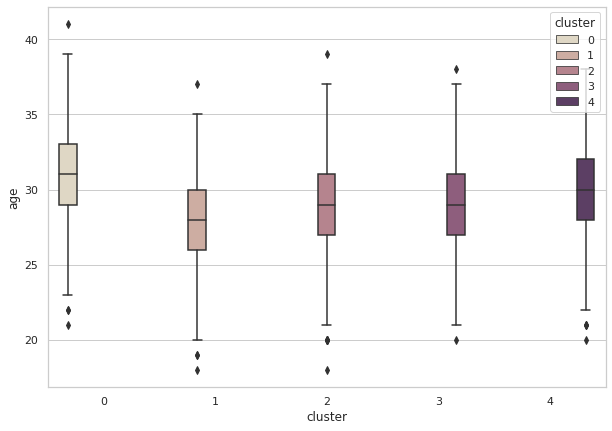

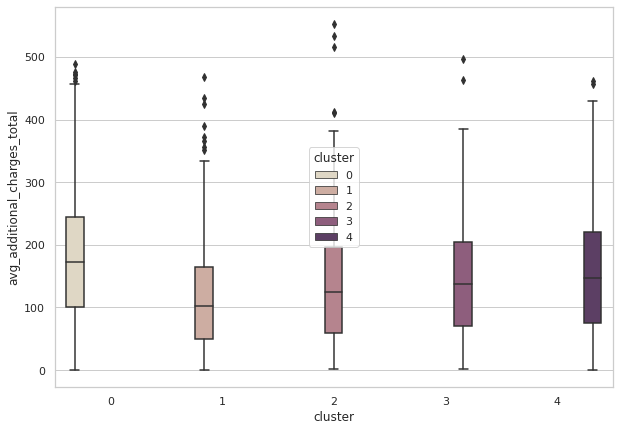

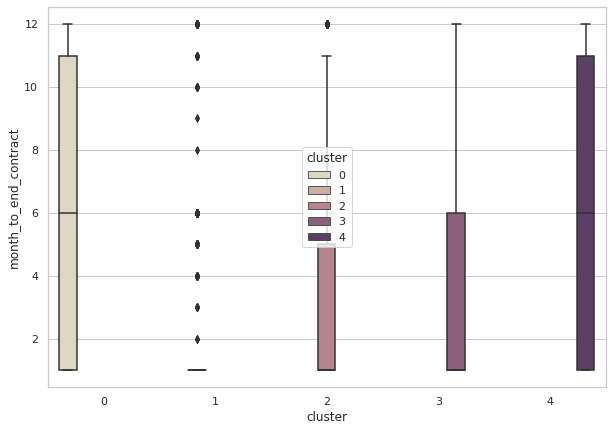

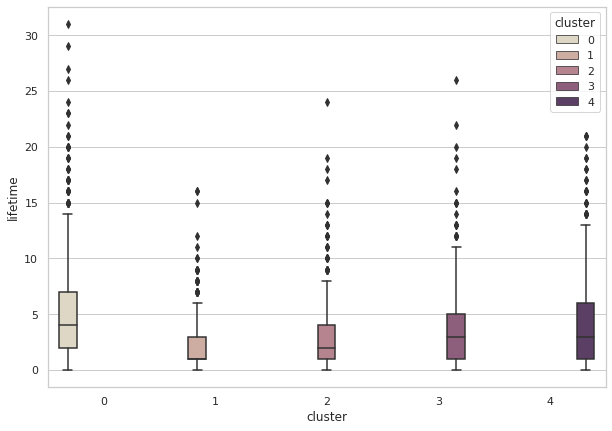

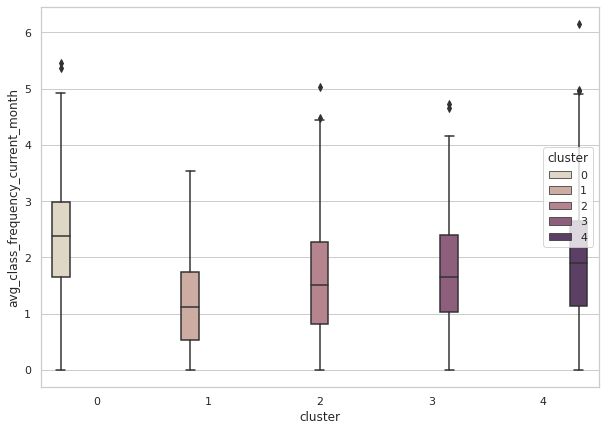

In [19]:
# Numeric features plots:
print("Numeric Features:")
for feature in numerical_feats.columns:
    plt.figure(figsize = (10,7))
    sns.color_palette("cubehelix")
    sns.set_theme(style="whitegrid")
    sns.boxplot(x = categrical_feats['cluster'], y = numerical_feats[feature], hue = categrical_feats['cluster'], palette = sns.color_palette("ch:s=-.2,r=.6"))
    plt.show()

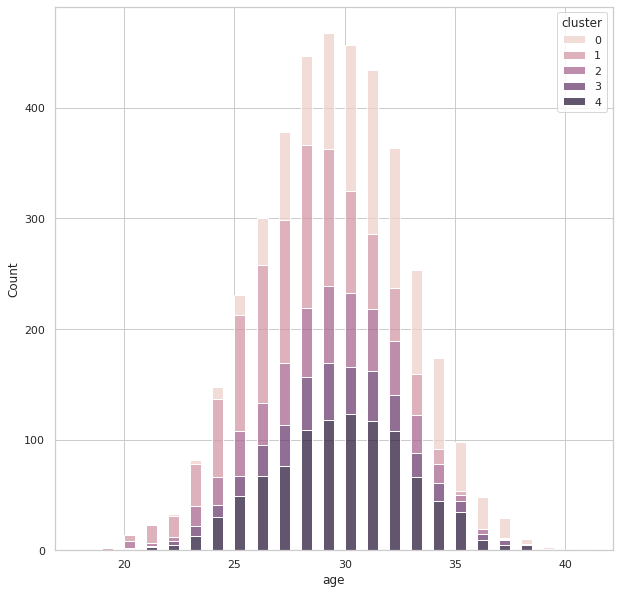

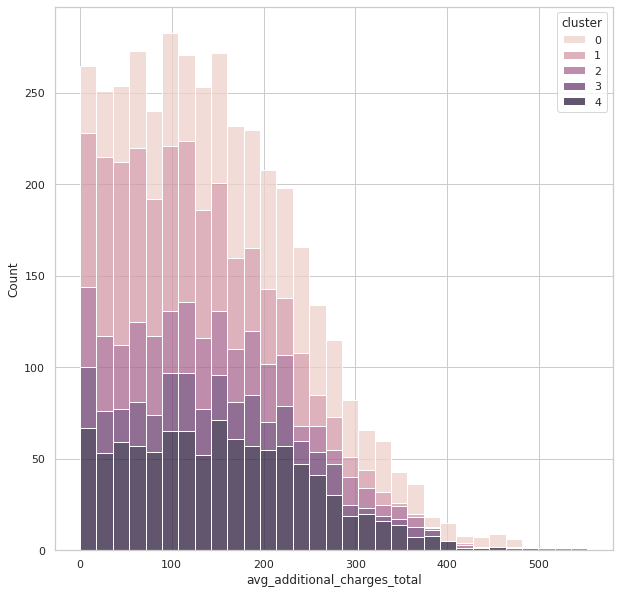

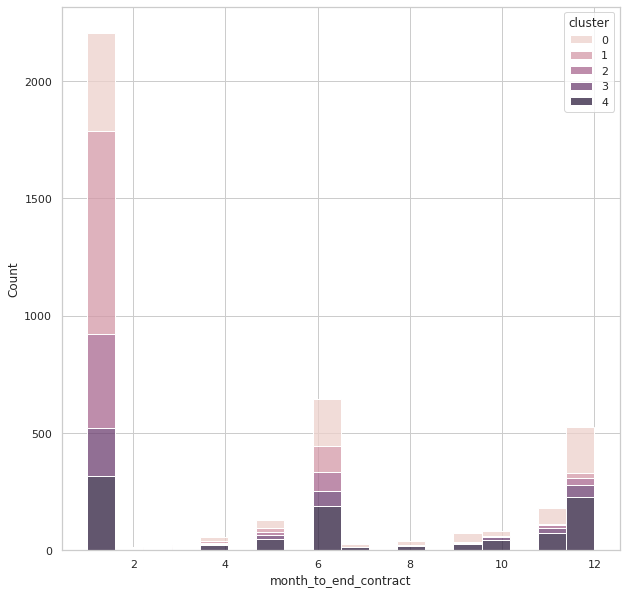

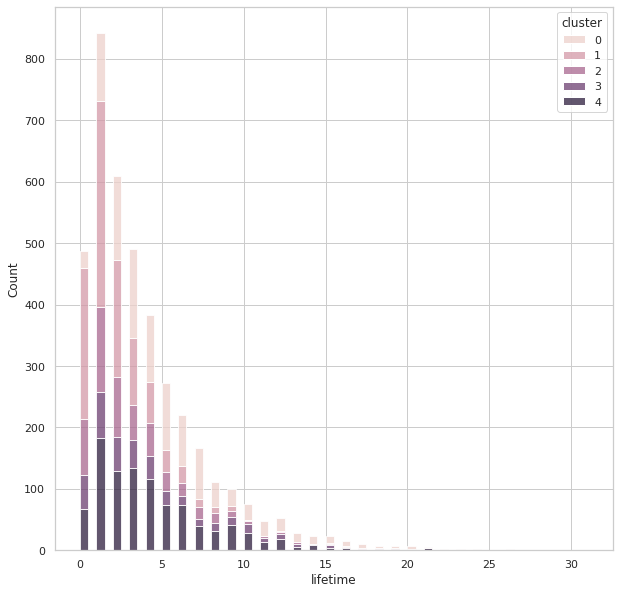

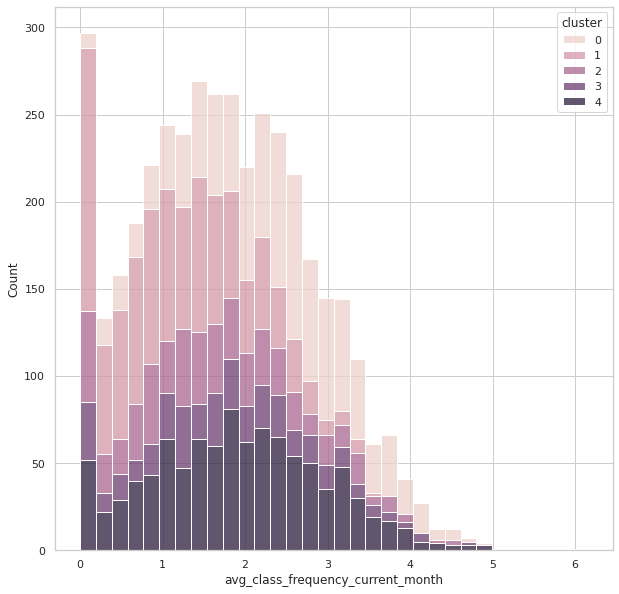

In [20]:
for feature in numerical_feats.columns:
    plt.figure(figsize = (10,10))
    sns.color_palette("cubehelix")
    sns.histplot(x = numerical_feats[feature], hue = categrical_feats['cluster'], multiple = 'stack', palette = sns.cubehelix_palette(as_cmap=True))
    plt.show()

Categorical Features:


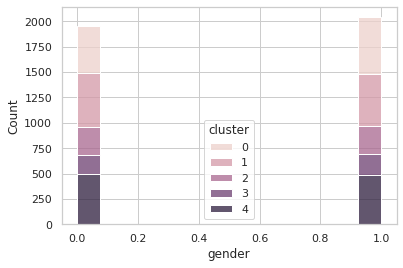

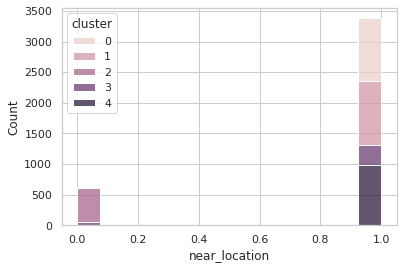

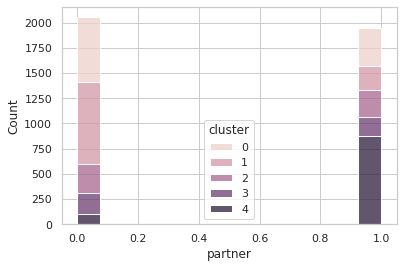

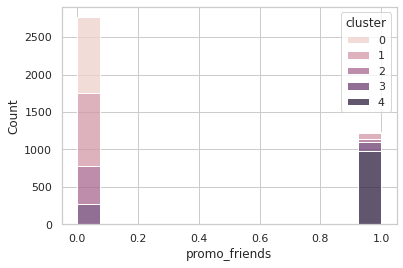

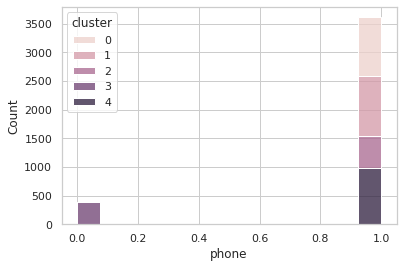

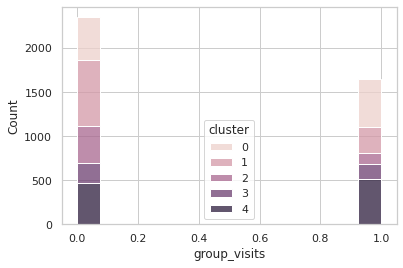

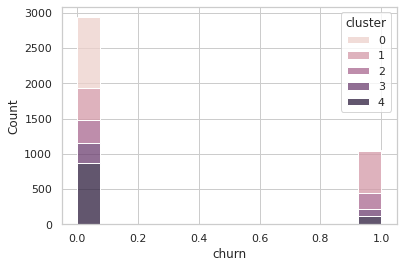

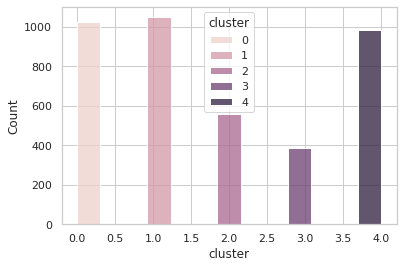

In [21]:
print("Categorical Features:")
for feature in categrical_feats.columns:
    sns.histplot(x = categrical_feats[feature], hue = categrical_feats['cluster'], cbar = True, multiple = 'stack')
    plt.show()

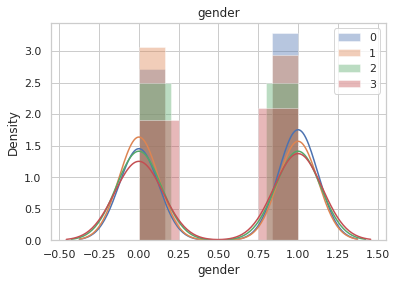

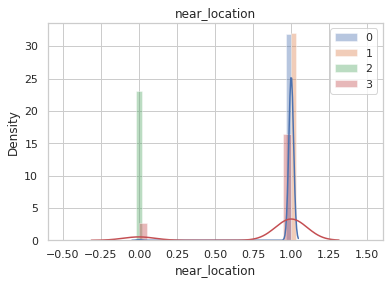

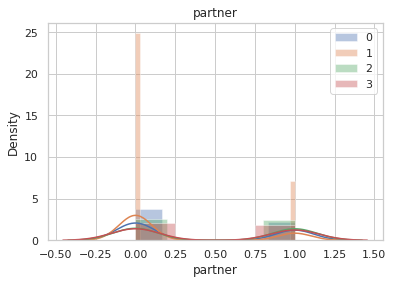

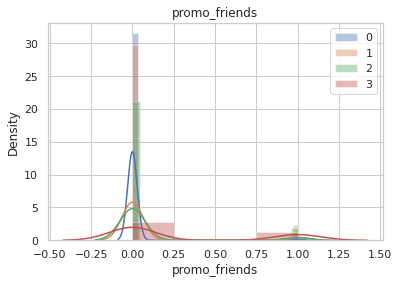

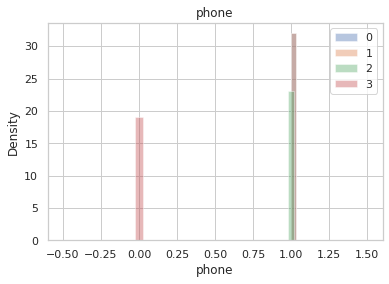

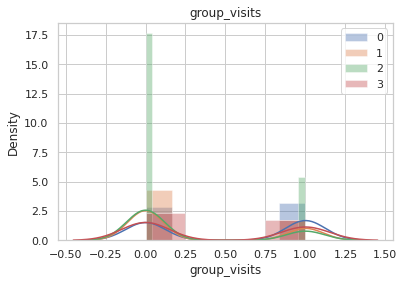

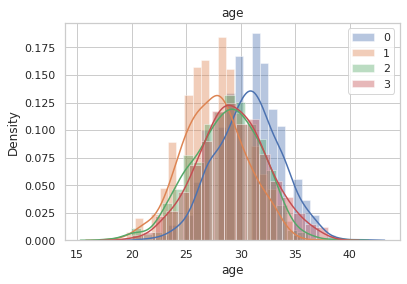

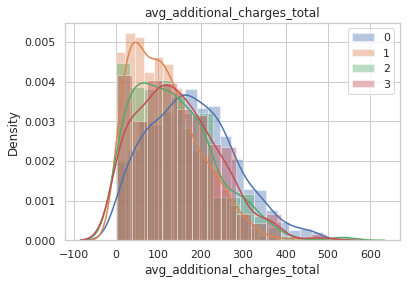

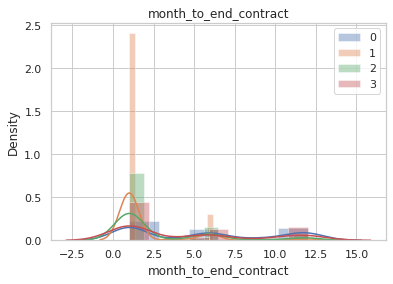

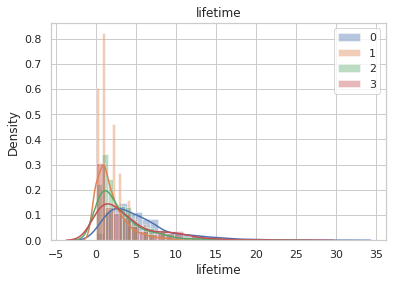

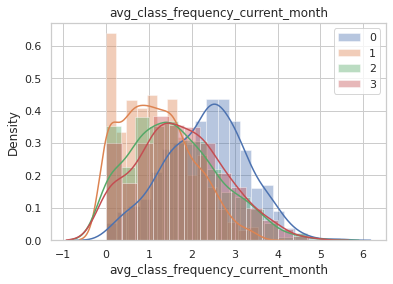

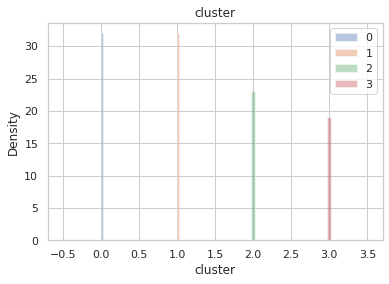

In [22]:
for feature in gym.drop('churn', axis = 1):
    for i in range(4):
        gym_cluster = gym[gym['cluster'] == i]
        sns.distplot(gym_cluster[feature], label = i)
    plt.title(feature)
    plt.legend()
    plt.show()

In [23]:
gym_grouped_churn = gym.groupby('cluster')['churn'].mean().reset_index()
gym_grouped_churn

,cluster,churn
0,0,0.016602
1,1,0.570611
2,2,0.403226
3,3,0.266839
4,4,0.119919


The graphs confirm the our "groupby":
We see that cluster 1 have the lowest churn rates while cluster 2 have the highest.

In [24]:
gym_grouped_churn = gym_grouped_churn.sort_values('churn', ascending = False).reset_index(drop=True)
print("PRONE TO LEAVING")
for i in gym_grouped_churn[['cluster', 'churn']].index:
    print('Cluster', gym_grouped_churn.iloc[i,0],'{:.2%}'.format(gym_grouped_churn.iloc[i,1]))
print("   MOST LOYAL")

PRONE TO LEAVING
Cluster 1 57.06%
Cluster 2 40.32%
Cluster 3 26.68%
Cluster 4 11.99%
Cluster 0 1.66%
   MOST LOYAL


## Final conclusion

1. We found out that customers with low **group visits**, **lifetime** and **additional total charges paid** values are more prone to churn than other customers. Thus, we recommend the GYM team to get involved more with those customers and show them more attention in real-time. - if possible. Caring and giving attention to your customers may give them the feeling that they matter and they are being cared for which may lead to more involvement in their behalf. Once those customers have a higher lifetime in the gym and have spent more additional charges, they will be less likely to churn!

2. Customers that belong to a partner company are less likely to churn - maybe their loyality is derived from their loyality to their company (your partner) or maybe due to the discounts they may get - possibly for both reasons. We recommend you to get the GYM more **partners** and ask your partners to advertise more about your gym, this way you will be getting much more customers that belong to a **partner** and they are less prone to churn!

3. This may be extreme recommendation - but, a very high percent of customers that churn live or work far from the GYM - making it harder for them to reach the GYM, this would demotivate the  customers to come and will cause them to churn. We mentioned that this may be extreme, why? because the solution to this would be opening another GYM close to those customers. But you probably don't want to go that extreme, maybe offer those customers something other gyms doesn't offer them? This would motivate them to keep coming - free shakes, yeeha!

4. Customers that don't sign-up their phone numbers tend to churn more than those who sign-up with their phone numbers. Easy solution, make sure to pursue every customer to sign-up with their phone number and you'll have less churns!

5. Finally, we've noticed that customers between ages 25-30 tend to churn more than all other ages while ages from 30-35 tend to **stay** more than all other ages. You may want to keep an eye on there metrics, what could possibly be the reason?
